## Programming for Data Analysis Final Project
### Lecturer: Brian McGinley
#### Submission Date: 16/12/2019

#### Instructions

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. 
* Investigate the types of variables involved, their likely distributions, and their relationships with each other. 
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

#### Assignment Criteria and Workflow
* Create Jupyter notebook, synced to a Github account for lecturer access.
* Choose an accurate phenomenon and count exceeding 100 data points with at least four variables.
* Compose simple definitions and short task descriptions.
* Compile routine measurements and agreement between measurements.
* Carefully choose solutions.
* Sample appropriately & create the dataset.
* Use a simple visualizations to explain relationships.
* Analyze dataset and phenomenon and detail any conclusions.  

#### Structure

###### 1. Introduction
###### 2. Phenomenon
###### 3. Assumptions
###### 4. Dataset Generation
###### 5. Analysis of Variables
###### 6. Conclusion
###### 7. Reference List

# 1. Introduction
 
The objective of this assignment is to simulate a dataset of a real world phenomenon that is of interest and then analyze the dataset using various python codes and python packages throughout. 
The packages used in this dataset include Numpy, Scipy, Matplotlib, Seaborn and Pandas. 
The simulation of the dataset will be completed using Numpys random package and then Pandas dataframe function to create the dataset on one output. 

The simulated dataset will be based on the phenomenon of the final of a league based poker tournament format where the participants gain entry by entering at least one of the leagues gameweeks. There will be 150 entrants used within this poker tournament example.

The description of this phenomenon, assumptions related to it, and generation of this dataset in its entirety will be discussed first. The simulated dataset will then be output in this notebook.

Finally the dataset will be analyzed, manipulated, visualized, assessed and have conclusions drawn from it in its entirety and the relationships, if any, between the variables within it to justify the phenomenon.

To introduce the following code is submitted to import the various packages used throughout this assignment. 


In [1]:
#Importing the Python packages to be used in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#allow inline interactive matplotlib plots
%matplotlib inline
import seaborn as sns

# 2. Phenomenon

### Final of a League Format Poker Tournament

The phenomenon chosen for this assignment is the generation of the final table dataset for a poker tournament based on several variables. The reasoning behind this is an interest in poker and the unpredicatable, probability driven nature of poker and the fact that the dataset can be simulated using randomization allows an open interpretation. Geeks for Geeks (2019) also state that "generating random numbers has always been an useful utility in day-day programming for games or various types of gambling etc. Hence knowledge and shorthands of it in any programming language is always a plus to have". 

The poker tournament used is based on a league format. The league consists of 150 participants/players. There are 30 gameweeks. The 150 participants are defined based on sex, age and into randomly assigned poker playing levels of beginner, intermediate and advanced.

The players gain points each week for playing, graded on the participants placement in each gameweek, i.e. 1 point for each of the 150 participants meaning last place gets 1 point, 75th gets 75 points and 1st gets 150, and so on.

These points are accumulated throughout gameweeks and are related to the gameweeks played meaning those in the range of gameweeks played 0-10 will have less points than 10-20 and so on.

The final tournament chip count for playing is then calculated from these points accumulated to give final chip counts which the players will play with at the final of the tournament.

The final data point that will be simulated and added into the dataset to assume its relevance to a players positioning in the final draw, is previous hand win percentage. The following table stands to show details of the data set, the data types within and their stipulations in one list;

Number of Inputs: 150
Number of Attributes/columns: 8 - chip count, total points from game weeks, game weeks played, level of player, hands win percentage, sex, age, count.
Attribute Measurement:
* count = numeric - count of players in the final - 150 total.
* chips = numeric - count of chips per player in the final - 500 per point + 1000 bonus.
* gwp = numeric - amount of game weeks played in the tournament = 30 total.
* totalpts = numeric - full count of points gathered throughout the league = ranging 1-150 per week.
* gender = classification of sex - Male/Female.
* age = numeric - range of ages of players - range chosen - 18 - 75.
* level = classification - 3 levels of player - beginner, intermediate, advanced.
* handswon% = numeric percentage - percentage of hands played, where player was successful - lowest win rate 25% - highest 65%.
Dataset Analysis Type: Multivariate

The multivariate analysis style of this dataset is an overall classification but within these assignment there will a mixture of univariate analysis, bivariate analysis and multivariate analysis in an attempt to see if there are more explanations inferred in the dataset to explain the relationships.

The dependent variable in this dataset, i.e. the variable that needs to be understood or predicted, is the total chip count. The independent variables which may or may not have influence in the total chip counts are the remaining variables in the dataset, excluding arguably the total points column as it is correlated with chip counts. Thus, the simulated dataset will use all of these pre-tournament data points to try and figure out some of these primary following queries;

- Is there a relationship between final chip counts and gameweeks played?

- Is there a relationship between final chip counts and gender?

- Is there a relationship between final chip counts and age?

- Is there a relationship between final chip counts and level?

- Is there a relationship between final chip counts and hands won percentage?

- Are there other interesting observations within a combination of these relationships and do any of them tend to explain the participants amassing of chips for the final and possibly predict their potential to win the tournament overall?

# 3. Assumptions

This section is included because there are several assumptions proposed prior to generating the dataset in an attempt to justify the phenomenon and to administer some semblance of structure so that it is not entirely randomized. A brief justification and/or brief assumptions per column are explained below;

###### Count - 
150 Players - The count fits above the boundaries of 100 data points as per this assignment and the 150 players allow for easier section in low, middle and high range that are used in the code generation here after. It could also be an accurate and realistic field for a poker tournament such as the one detailed.

###### Game weeks played - 
30 Weeks - A realistic weeks played assumption for similar formats but again it can be easier subdivided in line with 150 players.

###### Total points from game weeks -  
Many of the poker league formats work off a point system, with some of them rewarding those in the top 10 but a point for each player and then distributed along the 150 participants was assumed as the simulation of data could make it difficult to award points just to the top players where Numpy's random generator could over assign to some participants and vice versa.

###### Level of player - 
Standardized level of any sports and the only entirely randomized simulation across the 150 as many tournaments and card games in general can have beginners, intermediate and advanced players. It can be assumed that the points gathered and likelihood to perform better would be based on experience level.

###### Sex -
Gender plays a big part in poker as the significant majority are male and Sofen (2018) explains "Poker is unquestionably thriving among men, but women remain underrepresented in poker rooms all around the world and at the Main Event.Last year, just 272 of the 7,221 entries were female (3.7 percent)" (Sofen, 2018). For the purpose of this assignment males will represent 90% of the field and female the remaining 10% to reflect a little higher than this representation.

###### Age -
Age is another element which could impact a poker tournament. There is no upper age limit in card playing games and as jurisdiction dependent lower age limit of 18. There was a trend for more younger players in 18-25 but that has decreased in recent years (Ruddock, 2018) and here we will use a fully randomized age range of 18 to 75 and map these onto the count overall. 

###### Hand win percentage: 
The per hand win range has been set between 25% and 65% for the participants. It has been said the best players only win 55% - 60% of the time but as BlackRain79 (2018) argue this range can be must larger but only the most successful got above 70% so it was limited at 65% for the purpose of this assignment. The range was subdivided in to a smaller range, middle range and higher range and then combined low to high so as to justify how those with lower chips should by logic have a lesser win rate. 

###### Total chip count -
The participants ages will be generated in the range 18-75 considering the likelihood of ages of participants in a tournament.
Each point gets 500 chips so these are generated from the points column by multiplying them plus a 1000 bonus chips for each participant in the final.

# 4. Dataset Generation 
### Using numpy.random package

The dataset for the poker league phenomenon will be simulated under each of the variables listed above, and the code to do such will be listed below. The numpy.random and its respective programs all utlize what is known as a pseudorandom number generator to provide the random numbers which are returned. "Pseudorandomness is a sample of numbers that look close to random, but were generated using a deterministic process" (Brownlee, 2019) and the logic input to these generations stem from the assumptions above and numpy's random package is used because "an important part of any simulation is the ability to generate random numbers" (Phuong and Czygan, 2015, p.8). The primary numpy and numpy.random functions that will be used in this section are listed and briefly detailed below;

* sort() - for sorting a list from low to high of an array.
* append() - adding elements into a combined array.
* arange() - provides a sorted array with inputs to define the arrangement.
* randint() - returns an array of inputted shape with random integers in range (low, high). The elements can be inputted as (low, high, size, datatype).
* random_integers() - returns random integers of type np.int in style (low, high, size) between low and high, inclusive. Except a high does not have to be defined and the low can be thus the high as shown.
* choice() - Generates a random sample from a given 1-D array.
* permutation() - Randomly permute or rearrange a sequence, or return a rearranged range.
* random.seed() - sets the random seed in the pseudorandom number generator (PRNG) and provides an essential input required for the PRNG to return pseudo-random numbers.

Next, each variables array, or data points, will be generated with 150 returns using a combination of these numpy random functions with short explanations supplementing the code;

##### (i) Count

In [2]:
# The count of players in the poker tournament using arange() which returns 1-150 as expected
field = np.arange(1, 151)

##### (ii) Gameweeks Played

In [3]:
#The creation of gameweeks played using random.randint() in three separate returns of size 50.
#The 3 returns are in the ranges, 1-10, 11-20, 21-30 gameweeks.
#The functions are seeded using random.seed() and joined using append().
np.random.seed(1)
gwp10 = np.random.randint(1, 10, 50)
np.random.seed(1)
gwp20 = np.random.randint(11, 20, 50)
np.random.seed(1)
gwp30 = np.random.randint(21, 30, 50)
np.random.seed(1)
#created ranges and joined to combine into a single array.
partweek = np.append(gwp10, gwp20)
totalgwp = np.append(partweek, gwp30)
#Returning combined array of 150 random simulated gameweeks played.
totalgwp

array([ 6,  9,  6,  1,  1,  2,  8,  7,  3,  5,  6,  3,  5,  3,  5,  8,  8,
        2,  8,  1,  7,  8,  7,  2,  1,  2,  9,  9,  4,  9,  8,  4,  7,  6,
        2,  4,  5,  9,  2,  5,  1,  4,  3,  1,  5,  3,  8,  8,  9,  7, 16,
       19, 16, 11, 11, 12, 18, 17, 13, 15, 16, 13, 15, 13, 15, 18, 18, 12,
       18, 11, 17, 18, 17, 12, 11, 12, 19, 19, 14, 19, 18, 14, 17, 16, 12,
       14, 15, 19, 12, 15, 11, 14, 13, 11, 15, 13, 18, 18, 19, 17, 26, 29,
       26, 21, 21, 22, 28, 27, 23, 25, 26, 23, 25, 23, 25, 28, 28, 22, 28,
       21, 27, 28, 27, 22, 21, 22, 29, 29, 24, 29, 28, 24, 27, 26, 22, 24,
       25, 29, 22, 25, 21, 24, 23, 21, 25, 23, 28, 28, 29, 27])

###### (iii) Total Points

In [4]:
#The creation of total points using random.randint() in three separate returns of size 50.
#The 3 returns are in the ranges, 30-150, 151-300, 301-600 gameweeks.
#The lowest range of 30 was chosen to avoid the random generator providing points
#which would not correspond to gameweeks played.
# i.e. Player could have 10 gwp and only 1 point ---- does not compute with logic.
#The functions are seeded using random.seed() and joined using append().
np.random.seed(1)
ptlow = np.random.randint(30, 150, 50)
np.random.seed(1)
ptmed = np.random.randint(151, 300, 50)
np.random.seed(1)
pthigh = np.random.randint(301, 600, 50)
np.random.seed(1)
#created ranges and joined to combine into a single array.
ptpart = np.append(ptlow, ptmed)
totalpts = np.append(ptpart, pthigh)
#Returning combined array of 150 random simulated points gained.
totalpts

array([ 67, 137,  42, 102,  39, 105,  35, 109,  94,  46,  31, 106, 101,
       139,  36,  55,  80,  50, 131,  48, 114,  41, 136,  58,  59,  44,
        80,  98, 117, 117, 135, 143, 149, 124, 126, 116,  43, 135,  39,
        37,  93,  91,  52,  87,  31,  30,  90, 111,  38, 118, 188, 291,
       223, 288, 284, 230, 295, 280, 222, 285, 176, 171, 252, 297, 290,
       293, 201, 219, 247, 237, 292, 288, 158, 214, 212, 173, 208, 152,
       279, 211, 159, 292, 266, 272, 181, 222, 282, 200, 208, 154, 175,
       194, 227, 177, 203, 231, 260, 266, 192, 166, 338, 536, 373, 556,
       504, 434, 445, 430, 372, 538, 582, 479, 577, 555, 553, 457, 351,
       369, 516, 542, 387, 442, 308, 323, 302, 510, 565, 517, 442, 416,
       422, 331, 372, 350, 304, 581, 344, 377, 327, 410, 598, 316, 365,
       497, 326, 527, 583, 454, 405, 323])

##### (iv) Level of Player

In [5]:
#The creation of level of player using random.choice() in size 50.
#using random.seed to seed return.
np.random.seed(1)
# Defining the 3 groups.
three_groups = ('beginner', 'intermediate', 'advanced')
# Creating level array using random choice of groups with 150 returns.
level = np.random.choice(three_groups, 150)
level

array(['intermediate', 'beginner', 'beginner', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate', 'beginner',
       'intermediate', 'beginner', 'advanced', 'intermediate', 'advanced',
       'beginner', 'advanced', 'intermediate', 'advanced', 'beginner',
       'beginner', 'advanced', 'beginner', 'intermediate', 'advanced',
       'advanced', 'beginner', 'intermediate', 'intermediate', 'advanced',
       'beginner', 'advanced', 'intermediate', 'intermediate',
       'intermediate', 'intermediate', 'advanced', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate', 'beginner',
       'beginner', 'intermediate', 'advanced', 'intermediate', 'beginner',
       'advanced', 'advanced', 'intermediate', 'intermediate',
       'intermediate', 'beginner', 'beginner', 'intermediate', 'beginner',
       'advanced', 'beginner', 'beginner', 'intermediate', 'intermediate',
       'advanced', 'beginner', 'beginner', 'intermediate', 'advanced',
      

##### (v) Gender of Player

In [6]:
# Creating 150 returns of gender for assignment to players.
# Seeding the return.
np.random.seed(1)
# Creating small array of male and female strings for using random.choice() of strings.
male = ('male', 'male')
female = ('female', 'female')
# 10% women calculation as per assumptions means 135 male and 15 female.
# Using choice() to get split returns and append() to combine.
sex = (np.append(np.random.choice(male, 135), np.random.choice(female, 15)))
np.random.seed(1)
# Using the random.permutation function to reshuffle the females into the combined array.
gender = np.random.permutation(sex)
gender

array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'm

##### (vi) Age of Player

In [7]:
# Randomly generating 150 ages of players between the assumed range 18-75.
# Seeding the return.
np.random.seed(1)
# Using random.randint() using low 18 and high 75 with size 150.
age = np.random.randint(18, 75, 150)
age

array([55, 61, 30, 26, 27, 29, 23, 33, 18, 34, 19, 30, 25, 63, 24, 43, 68,
       38, 55, 36, 38, 29, 60, 46, 47, 32, 68, 22, 41, 41, 59, 67, 73, 48,
       50, 40, 31, 59, 27, 25, 40, 19, 18, 35, 26, 42, 31, 69, 65, 60, 26,
       48, 25, 21, 24, 39, 67, 21, 22, 42, 67, 61, 30, 44, 70, 34, 63, 69,
       59, 36, 33, 18, 22, 43, 65, 52, 41, 25, 44, 43, 58, 40, 27, 21, 57,
       41, 54, 45, 55, 37, 56, 26, 50, 52, 28, 41, 33, 65, 41, 43, 25, 69,
       46, 28, 64, 50, 42, 41, 73, 19, 67, 31, 21, 18, 74, 31, 24, 70, 39,
       24, 20, 30, 45, 39, 29, 25, 31, 26, 29, 30, 61, 38, 48, 54, 57, 25,
       63, 22, 66, 36, 50, 31, 28, 41, 35, 25, 42, 28, 46, 38])

##### (vii) Percentage of Hands Won

In [8]:
#The creation of hands won percentage using random.randint() in three separate returns of size 50.
#The 3 returns are in the ranges, 25-55, 35-60, 45-65 - representing percentage ranges.
#The size of 150 was split into 3 to reflect that those with the highest points
#are more likely to have a higher win percentage than those with less points.
#Seeding the return.
np.random.seed(1)
# Using random.randint() for each of the 3 ranges with different lows, highs and same size of 50.
smallwin = np.random.randint(low= 25, high=55, size = 50)
midwin = np.random.randint(low= 35, high=60, size = 50)
highwin = np.random.randint(low = 45, high =65, size =50)
#created ranges and joined to combine into a single array.
allwin = np.append(smallwin, midwin)
handswon = np.append(allwin, highwin)
# Returning combined array of 150 returns showing hand win percentage figures.
handswon

array([30, 36, 37, 33, 34, 36, 30, 40, 25, 41, 26, 37, 32, 38, 53, 31, 50,
       43, 45, 30, 43, 45, 36, 53, 35, 53, 54, 39, 43, 29, 48, 48, 34, 42,
       48, 25, 47, 38, 34, 34, 32, 54, 47, 50, 26, 25, 53, 42, 33, 49, 48,
       54, 50, 45, 43, 42, 38, 41, 56, 52, 38, 39, 59, 52, 46, 47, 55, 51,
       48, 54, 44, 53, 50, 35, 39, 50, 37, 58, 42, 43, 57, 44, 38, 42, 58,
       39, 40, 54, 41, 43, 35, 37, 45, 58, 50, 50, 58, 42, 54, 45, 59, 45,
       46, 62, 58, 48, 45, 58, 51, 51, 47, 57, 56, 52, 58, 53, 56, 57, 56,
       49, 52, 52, 58, 49, 61, 63, 45, 58, 55, 62, 52, 55, 45, 57, 46, 54,
       63, 64, 46, 47, 57, 52, 47, 55, 45, 54, 63, 51, 47, 52])

##### (viii) Total Chip Counts

In [9]:
#Calculating total chip counts from the total points column for 150 players.
#Each point generates 500 value chip so this is multiplied by the totalpts column.
#There is a bonus 1000 for each participant of the tournament which is then added.
#Seeding the return
np.random.seed(1)
#Defining chips 500(Chip) x point + 1000(Bonus)
chips = 500 * totalpts + 1000
chips

array([ 34500,  69500,  22000,  52000,  20500,  53500,  18500,  55500,
        48000,  24000,  16500,  54000,  51500,  70500,  19000,  28500,
        41000,  26000,  66500,  25000,  58000,  21500,  69000,  30000,
        30500,  23000,  41000,  50000,  59500,  59500,  68500,  72500,
        75500,  63000,  64000,  59000,  22500,  68500,  20500,  19500,
        47500,  46500,  27000,  44500,  16500,  16000,  46000,  56500,
        20000,  60000,  95000, 146500, 112500, 145000, 143000, 116000,
       148500, 141000, 112000, 143500,  89000,  86500, 127000, 149500,
       146000, 147500, 101500, 110500, 124500, 119500, 147000, 145000,
        80000, 108000, 107000,  87500, 105000,  77000, 140500, 106500,
        80500, 147000, 134000, 137000,  91500, 112000, 142000, 101000,
       105000,  78000,  88500,  98000, 114500,  89500, 102500, 116500,
       131000, 134000,  97000,  84000, 170000, 269000, 187500, 279000,
       253000, 218000, 223500, 216000, 187000, 270000, 292000, 240500,
      

### Creating the Dataset using Pandas Dataframe Function

Now that the arrays are generated using Numpy they shall now be combined into one single dataset output using the imported pandas package. Each array called above had a defined title and the following python programs inputted show the importing into a pandas Dataframe. Dataframe offers two dimensional labelled data structures with columns which can accept different data types.
As Willems (2019) states pandas "offers powerful, expressive and flexible data structures that make data manipulation and analysis easy" and "the DataFrame is one of these structures".

In [10]:
# Creating dataset of the numpy.random arrays above showing the various variables in explaining the poker tournament phenomenon.
# Using pandas Datframe() function in importing the arrays and titling the columns.
dataset = pd.DataFrame({'count': field, 'chips': chips, 'gwp': totalgwp, 
                        'totalpts': totalpts, 'gender': gender,
                        'age':age, 'level': level, 'handswon%': handswon})
# Hiding the index as the count column will act as the index using hide_index().
# Setting the style of the Dataframe using the pandas style() function which produces a neater output.
dataset.style.hide_index()

count,chips,gwp,totalpts,gender,age,level,handswon%
1,34500,6,67,male,55,intermediate,30
2,69500,9,137,male,61,beginner,36
3,22000,6,42,male,30,beginner,37
4,52000,1,102,male,26,intermediate,33
5,20500,1,39,male,27,intermediate,34
6,53500,2,105,male,29,beginner,36
7,18500,8,35,female,23,beginner,30
8,55500,7,109,male,33,intermediate,40
9,48000,3,94,male,18,beginner,25
10,24000,5,46,male,34,intermediate,41


# 5. Analysis of Variables
### Using the Newly Created Simulated Poker Tournament Dataset

Firstly, to analyze the dataset there will be various types of analysis of certain parts undertaken in explaining the poker tournament overall, as listed below:

1. Descriptive Statistics Analysis
2. Univariate Analysis
3. Bivariate Analysis (including regressional analysis)
4. Multivariate Analysis

Secondly, as seen, there are two types of data: categorical and numerical data. Categorical data is non numerical data such as gender, race, religion, etc. while numerical data is any data that have a measurement or count in data type, e.g. height, weight, age, etc. These data types will be analyzed using the above analyses hereafter.

Within this poker tournament data set the attributes are be subdivided into:

Categorical data:
- gender
- level

Numerical data:
- age
- gwp
- totalpts
- chips
- count
- handswon%

Finally the packages for analyzing and, most importantly, visualizing the variables in the poker tournament dataset will be as follows:

* Pandas - "is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language" (pandas Documentation, 2019).
* Matplotlib - "tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code" (Matplotlib Documentation, 2019). 
* Seaborn - a higher level data visualization package than matlplotlib which is built on top of it and Waskom has described it as "If Matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.” (Singh, 2019)

### Descriptive Statistics Analysis

Descriptive statistics - "are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population" Investopedia (2019). Brief descriptive statistical codes are set in pandas and they are outlined below;

#### Info()

In [11]:
# The info() function describes the index, column number, column names, data types, counts and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
count        150 non-null int32
chips        150 non-null int32
gwp          150 non-null int32
totalpts     150 non-null int32
gender       150 non-null object
age          150 non-null int32
level        150 non-null object
handswon%    150 non-null int32
dtypes: int32(6), object(2)
memory usage: 5.9+ KB


As seen the data types are int32 for all except the categorical data types, gender and level which are objects. There are 8 columns x 150 entries as expected.

#### mean()

In [12]:
# The mean() function outputs all means for the numerical data types.
dataset.mean()

count            75.500000
chips        126396.666667
gwp              15.120000
totalpts        250.793333
age              41.086667
handswon%        46.506667
dtype: float64

From this we can determine, on a basic level, the average player could have 126397 chips stemming from their 251 points, have played 15 gameweeks, with a win percentage of 46.51% and be 41 years of age.

#### std()

The measuring of variation is compiled by calculating the Standard Deviation of the dataset which details the variation in the spread of the values recorded, where a low standard deviation shows values close to the mean and high means spread of values are further from the mean. The mathematical calculation of the standard deviation is simplified by pandas through their std() function and it is used in Python in the following code:

In [13]:
dataset.std()

count           43.445368
chips        79657.031116
gwp              8.629526
totalpts       159.314062
age             15.703177
handswon%        9.248796
dtype: float64

The standard deviations could all be deemed to have a high spread from the mean showing a wide distribution dataset.

#### describe()

In [14]:
dataset.describe()

,count,chips,gwp,totalpts,age,handswon%
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,126396.666667,15.120000,250.793333,41.086667,46.506667
std,43.445368,79657.031116,8.629526,159.314062,15.703177,9.248796
min,1.000000,16000.000000,1.000000,30.000000,18.000000,25.000000
25%,38.250000,59500.000000,8.000000,117.000000,28.000000,40.000000
50%,75.500000,112250.000000,15.000000,222.500000,39.500000,47.000000
75%,112.750000,176375.000000,22.750000,350.750000,54.000000,54.000000
max,150.000000,300000.000000,29.000000,598.000000,74.000000,64.000000


Pandas have a useful function called as describe() which details dataset count, mean, standard deviation, minimum and maximum data points as well as the quartile ranges of 25%, 50% and 75% which and all be useful tools for understanding coefficients of the dataset on analysis. 

### Univariate Analysis

A univariate analysis attempts to analyze a singe variable within a dataset. For the numerical data types, we can use other panda's histogram [hist()] function as well as seaborn's [boxplot] function and for the categorical data types we can use seaborns bar chart type countplot() and pandas pie chart plot.pie();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CFF396780>]],
      dtype=object)

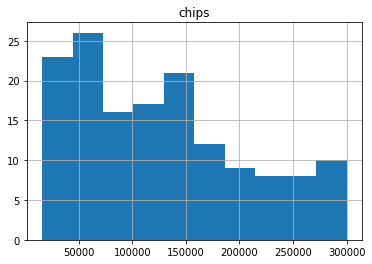

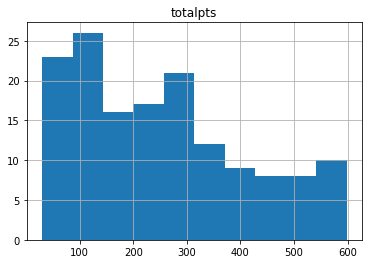

In [15]:
#Histogram showing the chip totals on the x axis and total of players with amounts on the y axis.
dataset.hist('chips')
#Histogram showing the points totals on the x axis and total of players with amounts on the y axis.
dataset.hist('totalpts')

#### Chips + Points: As you can see the distribution of both these above graphs are the same as they are both mapped off each other, as seen above.

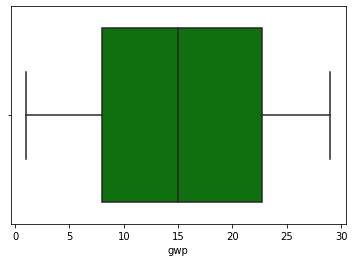

In [16]:
#Boxplot showing the gameweeks played distribution. 
#The box in green shows the spread from the mean and the lines from the box completing the total range.
sns.boxplot('gwp', data=dataset, color = 'g')

#### Gameweeks played: The green box shows a spread from mean of approx 8 - 23 gameweeks and the line extends to 1-29 range.

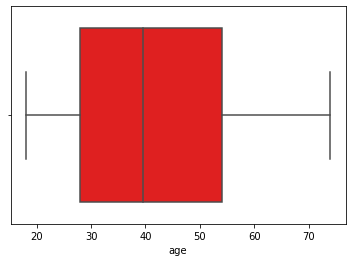

In [17]:
#Boxplot showing the age distribution. 
#The box in red shows the spread from the mean and the lines from the box completing the total range.
sns.boxplot('age', data=dataset, color = 'r')

#### Age: Box in red shows approximate spread from mean of 29 - 52 and extends to complete range of 19 - 72.

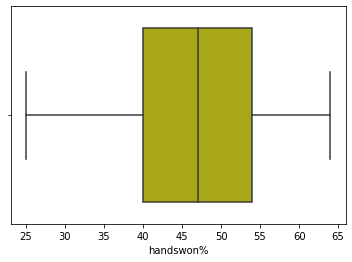

In [18]:
#Boxplot showing the hands won percentage distribution. 
#The box in yellow shows the spread from the mean and the lines from the box completing the total range.
sns.boxplot('handswon%', data=dataset, color = 'y')

#### Handswon%: Box in yellow showing an approximate range of 40 - 54 and an lines complete range to 25 - 64.

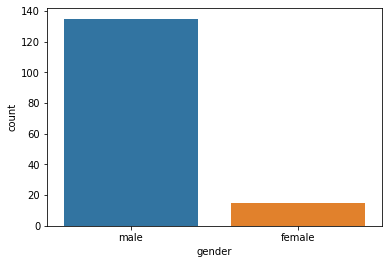

In [19]:
#Countplot showing the amounts of gender, either male or female.
bar1 = sns.countplot(x='gender', data=dataset)

#### Gender: Bar charts showing counts of gender column out of 150, as expected 135 males and 15 females in a visual representation.

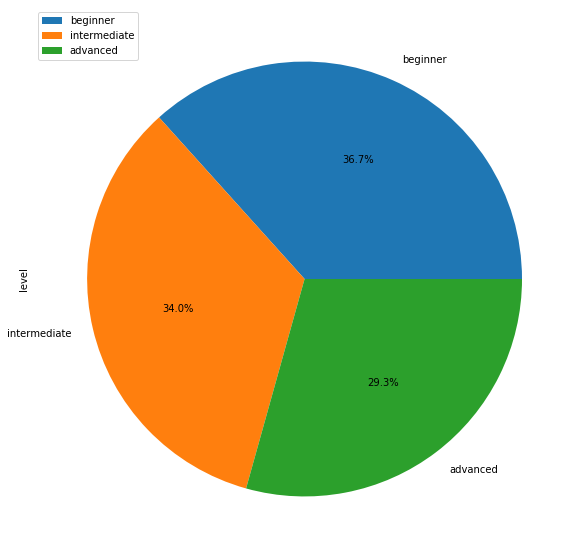

In [20]:
#Pie chart compiled to show a percentage breakdown of each of the three levels.
#Level Column: beginner, intermediate, and advanced.
type_counts = dataset['level'].value_counts()
dataset2 = pd.DataFrame({'level': type_counts})
dataset2.plot.pie(y='level', figsize=(10,10), autopct='%1.1f%%')

#### Level: Pie charts shows a percentage breakdown of the level column, with beginners representing the most at 36.7%, intermediate at 34% and advanced, the least of the 3 levels, at 29.3%.

### Bivariate Analysis 

A bivariate analysis is the process of analyzing two variables. To understand if their is a relationship between the dependent variable of total chip count and the remaining independent variables in this poker tournament dataset, various data visualization tools will be used.

### Plot()
First to show the linear relationship between total points and total chips we used Matplotlib's plot() function.

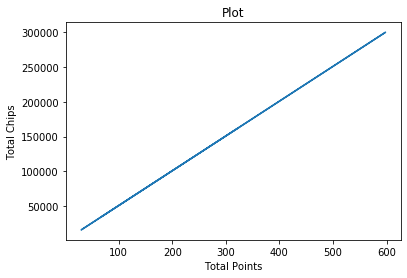

In [21]:
#Plot() called showing relationship between points and chips on x and y.
plt.plot(totalpts, chips)
plt.title("Plot")
plt.xlabel("Total Points")
plt.ylabel("Total Chips")
plt.show()

##### Total Chips vs Total Points: Exact Linear Relationship as expected from simulation.

### Lineplot()

Seaborns replot() function is a better visualization and can process various kinds of plots using the [kind = ' '] function as seen.

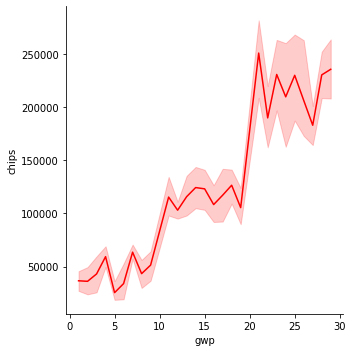

In [22]:
#Relplot and line kind type to plot the variables gameweeks played and chips.
sns.relplot(x="gwp", y="chips", data=dataset, kind = "line", color='r')

#### Total chips and game weeks played: The line plot shows the relationship between gameweeks played on the x and chips on the y axis where as the gameweeks played increased, the likelihood of chip counts also increases. The shaded red shows the spread from the line distribution.

### Scatter()

Scatter shows the graph with plots showing the data points.

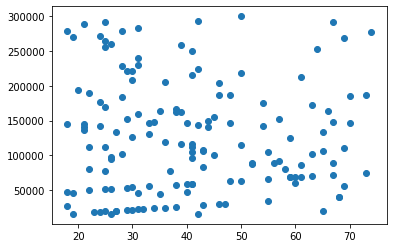

In [23]:
plt.scatter(age, chips)
plt.show()

#### Total chips and age - the scatter shows that the spread of data points across all ages between 18 and 75 has no identifiable distribution, meaning regardless of your age you could be no more or less likely to attain higher chip counts.

### Scatterplot()

Scatterplot() shows the graph with plots showing the data points.

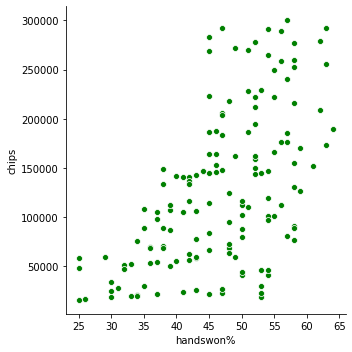

In [24]:
sns.relplot(x="handswon%", y="chips", data=dataset, kind = "scatter", color='g')

#### Total chips and hands won percentage: The hands won percentage has a wide spread of data points but the general trend shows that the greater the increase of hands won, the greater the amount of chips a player will have. 



### Stripplot()

Seaborns stripplot shows the data points linearly with the points expanding in strips of dots.

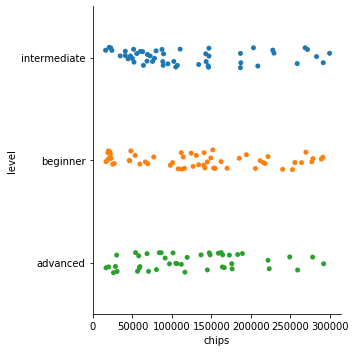

In [25]:
#Stripplot() showing the relationship between the total chips and level variables 
sns.catplot(x="chips", y="level", kind = 'strip', data=dataset)

#### Total chips and level of player = scatterplot displays that the data points for chip counts are evenly distribution across each level. From the stripplot() beginners are most evenly distributed, intermediate are less likely to be in the mid range and advance are less likely to be the top range of the total chip counts.

### Swarmplot()

Seaborns swarmplot shows data points in a swarm style of stripplot

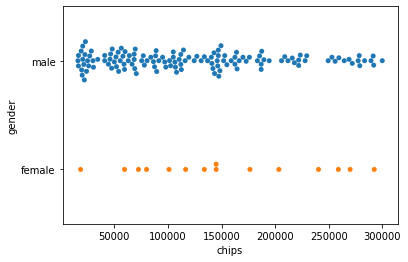

In [26]:
#Swarmplot() showing the relationship between the total chips and gender variables 
sns.swarmplot(x="chips", y="gender", data=dataset)

#### Total chips and Gender - the scatter shows that there were significantly less females than males but that proportionately the distribution across the total chip counts can be wide.

## Regressional analysis
A common statistical action is to use linear regression to separate classification problems where the line acts as a divide between the different classes (Marsland, 2015). Thus, we will use Seaborns regplot and lmplot functions to determine the linear regression between the total chip count and firstly game weeks played and secondly hands won percentage, the two determinants which could have a direct influence in amassing chips throughout the tournament. 

### Regplot()

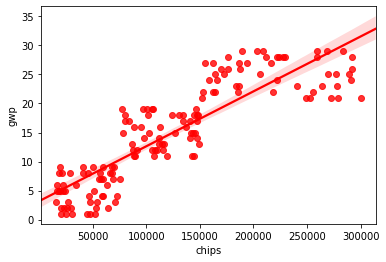

In [27]:
#using Seaborns regplot() to show linear regression in poker tournament dataset between chips and gwp
sns.regplot(x="chips", y="gwp", data=dataset, color = "r")

Regplot simulates a regressional line through the dataset which determines the relationship between the two variables, chips and gameweeks played. The analysis shows that the relationship is linear as the line grows in chip amount and in gameweeks played. The confidence interval, depicted by the shade red either side of the line is also narrow eliciting that the distribution does not have a wide dispersion from the statistical mean at each stage.

### Lmplot()

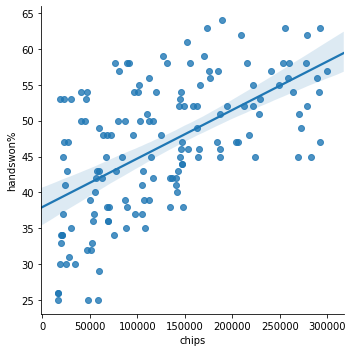

In [28]:
sns.lmplot(x="chips", y="handswon%", data=dataset)

Similarly, the lmplot() Seaborn function depicts a line through the datasets graph which tends to show a linear regression. As the chips on the x axis increase it maps linearly onto the increase in hands won percentage on the y axis.

Furthermore, as linear regression analysis hopes to predict trends the shaded areas either side of the lines are to portray the statistical mean along the line with a view of predicting generally the chip amounts at each point. This phenomenon is known as the aforementioned confidence interval and it reinforces the feeling that those on the extremes from the line and the shaded area are merely exceptions rather than the norm. There are further regressional analyses which can account for the spread of the dataset and the confidence interval. Reproducing similar examples to above in using the total points column instead of total chips and using the lowess function, the lmplot() graph deters the line off straight by setting the parameter lowess as True, as below;

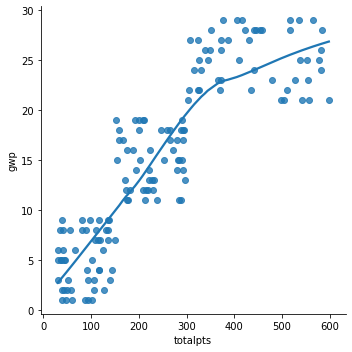

In [29]:
#using Seaborns lmplot including the lowess parameter in showing linear regression analysis between totalpts and gwp.
sns.lmplot(x="totalpts", y="gwp", data=dataset, lowess=True)

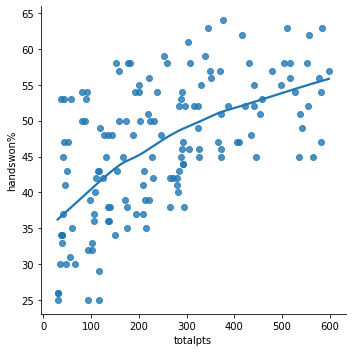

In [30]:
#using Seaborns lmplot including the lowess parameter in showing linear regression analysis by showing totalpts and handswon%.
sns.lmplot(x="totalpts", y="handswon%", data=dataset, lowess=True)

Both examples still show linear nature as the line does not move drastically off straight throughout its progression. Mapping the handswon% off the total chips does show more curvature than mapping game weeks played off the total chip count but this could correlate with the unpredicatable nature of poker tournament participation.

### Multivariate Analysis

A multivariate analysis is composed when trying to explain the relationship between two or more variables. 
Increasing the amount of variables on the data visualization can increase the complexity for the person viewing the graphical output. 

### Pairplot()
The first example is to use Seaborns pairplot() function which when undefined returns all numerical data types as seen in a bivariate analysis style but all on one grid:

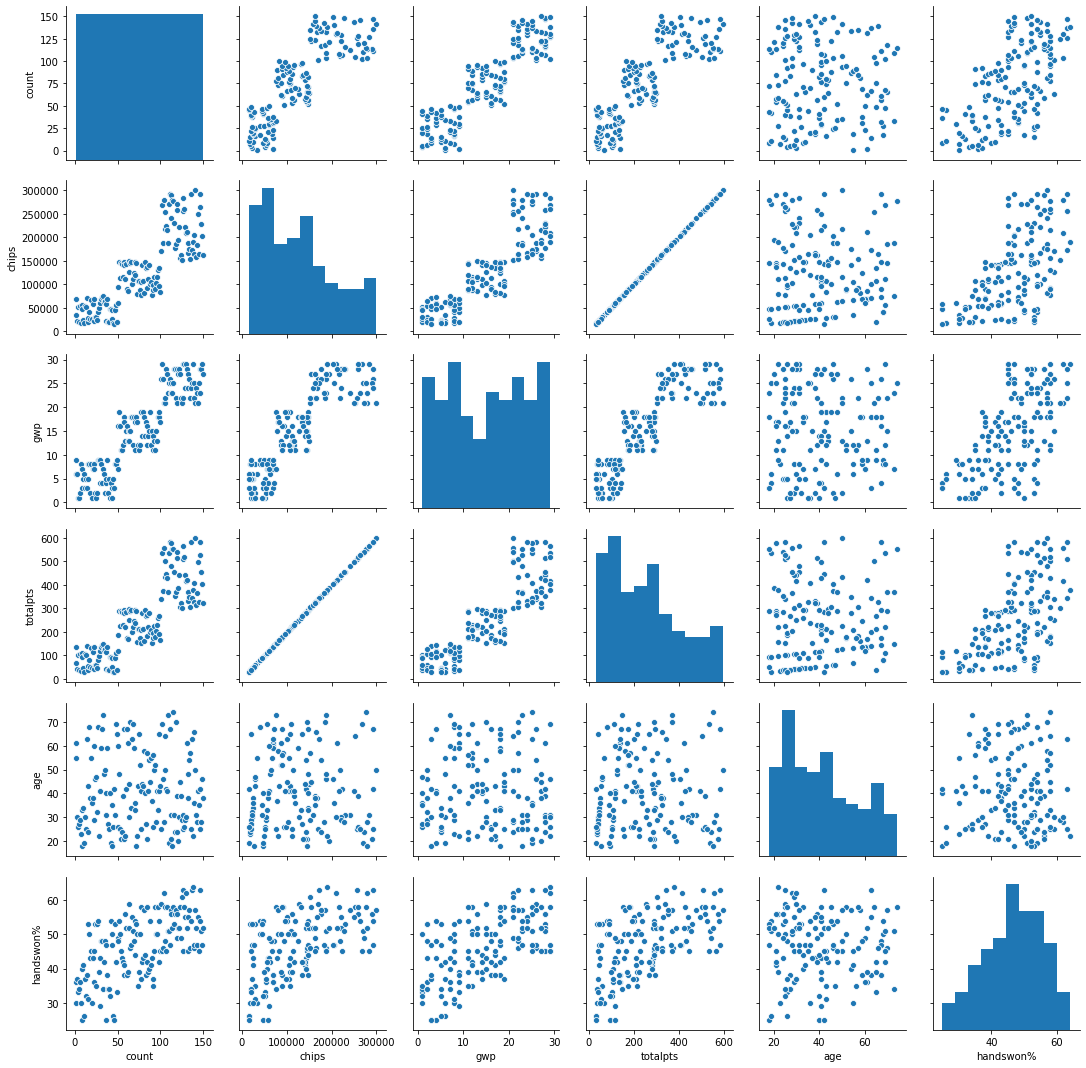

In [37]:
sns.pairplot(dataset)

Without definition of all variables and distinction between this output can look confusing to the end user but these analyses can be broken down using other Seaborn packages which can be viewed hereafter using the plots listed: 

* Boxplot()
* Violinplot(), 
* Pointplot(), 
* Boxenplot() 
* Swarmplot()
* Scatterplot()

### Boxplot()

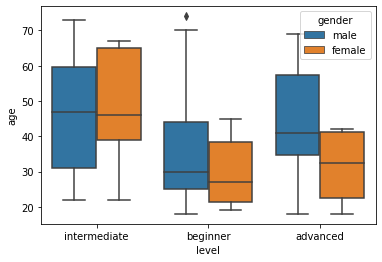

In [156]:
#boxplot() showing the relationship between the level, age and gender variables in the poker tournament dataset
sns.boxplot(x="level", y="age", hue="gender", data=dataset)

#### Explanation

### Violinplot()

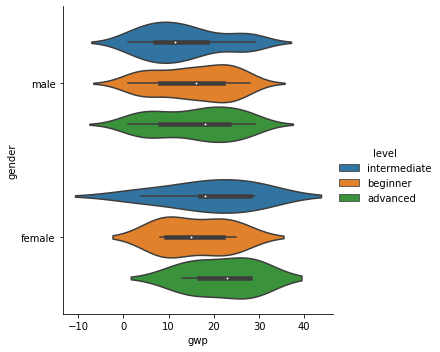

In [157]:
#violinplot() showing the relationship between the level, gwp and gender variables in the poker tournament dataset
sns.catplot(x='gwp', y="gender", hue="level", data=dataset, kind="violin")

#### Explanation

### Pointplot()

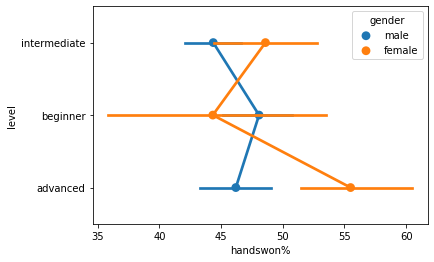

In [159]:
#pointplot() showing the relationship between the level, handswon% and gender variables in the poker tournament dataset
sns.pointplot(x="handswon%", y="level", hue="gender", data=dataset)

#### Explanation

### Boxenplot()

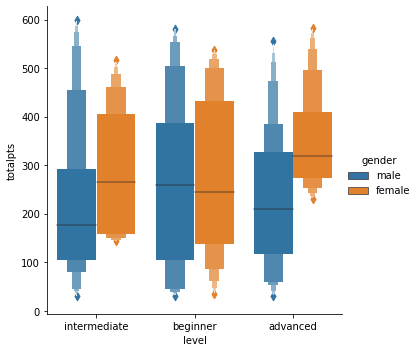

In [160]:
#boxenplot() showing the relationship between the level, totalpts and gender variables in the poker tournament dataset
sns.catplot(x="level", y="totalpts", hue="gender", data=dataset, kind="boxen")

#### Explanation

### Swarmplot()

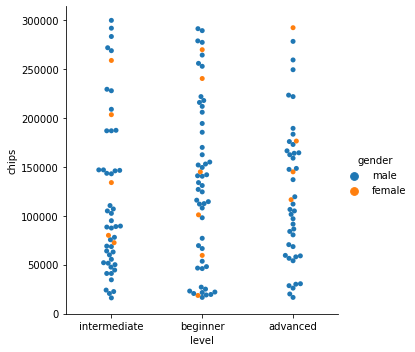

In [168]:
#swarmplot() showing the relationship between the level, chips and gender variables in the poker tournament dataset
sns.catplot(x="level", y="chips", hue="gender", data=dataset, kind="swarm")

#### Explanation

### Scatterplot()

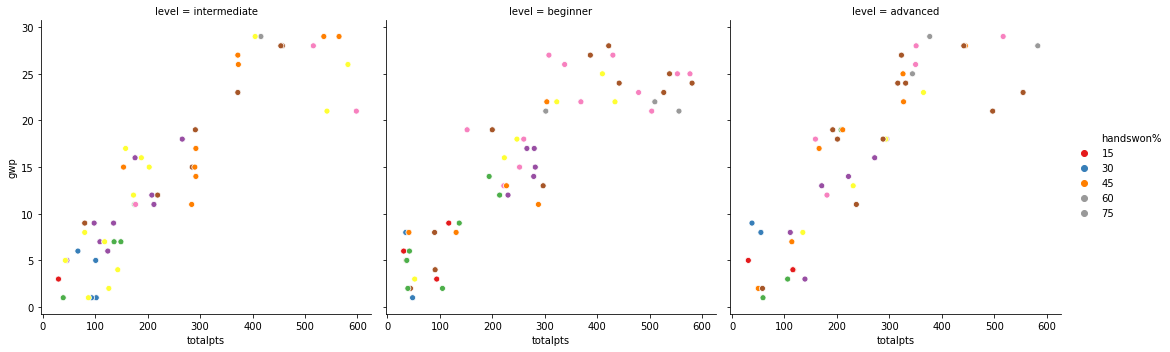

In [172]:
#using relplot and scatter kind to plot the variables totalpts, gwp, handswon% in the columns of level with a palette of Set1.
sns.relplot(x="totalpts", y="gwp", hue = "handswon%", col = "level", data=dataset, palette='Set1', kind = "scatter")

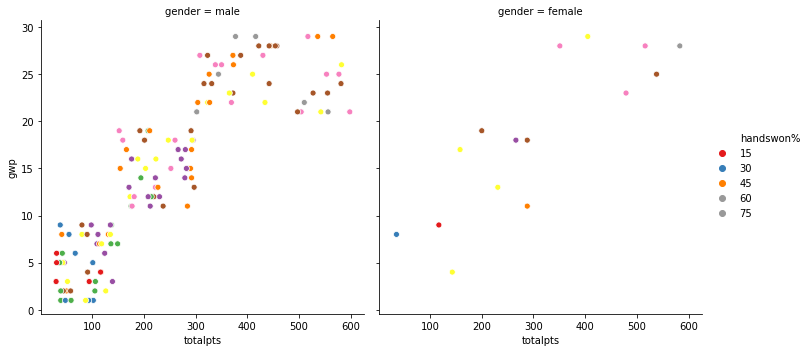

In [173]:
#using relplot and scatter kind to plot the variables totalpts, gwp, handswon% in the columns of gender with a palette of Set1.
sns.relplot(x="totalpts", y="gwp", hue = "handswon%", col = "gender", data=dataset, palette='Set1', kind = "scatter")

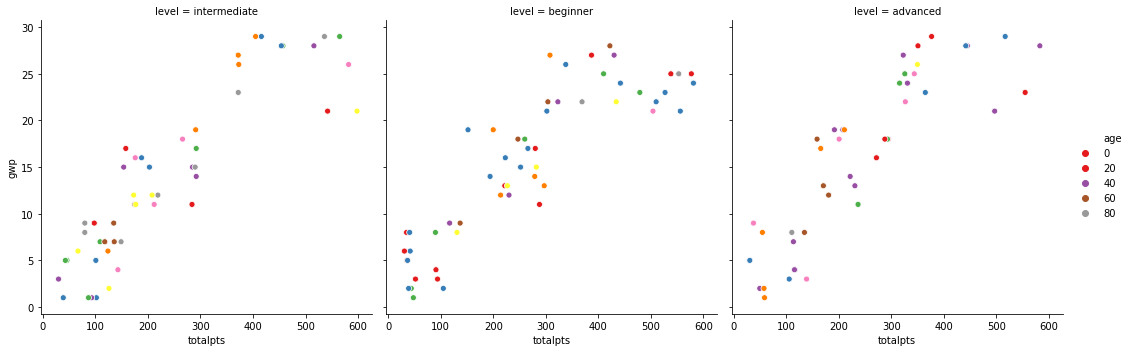

In [174]:
#using relplot and scatter kind to plot the variables totalpts, gwp, age in the columns of level with a palette of Set1.
sns.relplot(x="totalpts", y="gwp", hue = "age", col = "level", data=dataset, palette='Set1', kind = "scatter")

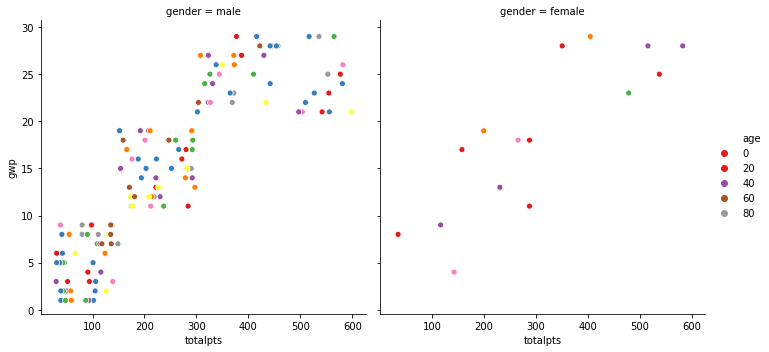

In [175]:
#using relplot and scatter kind to plot the variables totalpts, gwp, age in the columns of gender with a palette of Set1.
sns.relplot(x="totalpts", y="gwp", hue = "age", col = "gender", data=dataset, palette='Set1', kind = "scatter")

# 6. Conclusion

In conclusion the generation of the poker tournament dataset tended to show a real world phenomenon which could be simulated using numpy.randoms package. There were set assumptions as Tanguy (2019) states when you use numpy.random in multiprocess application, it can lead to misleading behaviors. These assumptions were in line with the format and some of the trends on current poker tournaments. It seems that the generation of a dataset with the variables outlined above, for a game which in real life is full of unpredicatability and so called luck can still be analysed if the correct data is gathered to show correlations amongst the variables. There are various other factors which could impact a poker tournament on a once off or over a league format such as this, including but not limited to; tournament days played, hands played, mentality, average stake, earnings/losses to date, and so on. Poker itself is based on probability but as long as the correct data is collected, it could be analyzed using pandas, seaborn and various other packages within Python just the same as any other dataset. 

# 7. Reference List:
1. Python Software Foundation. Accessed online at: https://www.python.org/
2. w3Schools.com Tutorials. Accessed online at: https://www.w3schools.com
3. Python by Programiz Tutorials. Accessed online at: https://www.programiz.com/
4. Pandas (2019) Python Data Analysis Library. Accessed online at: https://pandas.pydata.org.
5. NumPy (2019) Documentation. Accessed online at: http://www.numpy.org
6. matplotlib (2019) Pyplot Tutorial. Accessed online at: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html.
7. Seaborn (2019) Official Seaborn Tutorial. Accessed online at: https://seaborn.pydata.org/tutorial.html
8. Stack Overflow - Various queries for comparison and improving code output. Accessed online at: https://stackoverflow.com
9. SciPy.org (2019) Random Sampling (numpy.random). Accessed online at: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.rand
10. Tutorialspoint (2019) NumPy Tutorial. Accessed online at: https://www.tutorialspoint.com/numpy/index.htm.
11. Seaborn (2019) Visualizing statistical relationships. Accessed online at: https://seaborn.pydata.org/tutorial/relational.html
12. Investopedia (2019) Descriptive Statistics. Accessed online at: https://www.investopedia.com/terms/d/descriptive_statistics.asp
13. Doshi, S. (2019) Analyze the data through data visualization using Seaborn. Towards Data Science. Accessed online at: https://towardsdatascience.com/.analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
14. Pynative (2019) Python Random Number Generation tutorial. Accessed online at: https://pynative.com/python-random-module/
15. Brownlee, J. (2018) How to Generate Random Numbers in Python. Machine Learning Mastery.
16. Phuong, V. T. H and Cyzgan, M. (2015) Getting Started with Python Data Analysis. Accessed online at: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785285110/backindex
17. Singh, S. (2019) Become a Data Visualization Whiz with this Comprehensive Guide to Seaborn in Python. Analytics Vidhya. Accessed online at: https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/
18. Wajiha (2019) Python Seaborn Tutorial | Data Visualization Using Seaborn. Accessed online at: https://www.codementor.io/wajihaurooj/python-seaborn-tutorial-data-visualization-using-seaborn-wpj9qydr2.
19. Marsland, S. (2015) Machine Learning: An Algorithmic Perspective. Taylor and Francis Group.
20. GeeksforGeeks (2019) Creating a Pandas DataFrame.Accessed online at: https://www.geeksforgeeks.org/creating-a-pandas-dataframe/
21. Like Geeks (2019) Python NumPy Array Tutorial. Accessed online at: https://likegeeks.com/numpy-array-tutorial/
22. Tanguy (2019) How Does Your Computer Generate Random Numbers? Accessed online  at: https://www.sicara.ai/blog/2019-01-28-how-computer-generate-random-numbers
23. Cohen, O. (2019) The Definite Guide For Creating An Academic-Level Dataset With Industry Requirements And Constraints. Accessed online at: https://towardsdatascience.com/the-definite-guide-for-creating-an-academic-level-dataset-with-industry-requirements-and-6db446a26cb2
24. Inferential Thinking (2018) Randomness. Accessed online at: https://www.inferentialthinking.com/chapters/09/Randomness.html
25. BlackRain79 (2018) What is a Good Poker Winning Percentage? Accessed online at: https://www.blackrain79.com/2018/05/good-poker-winning-percentage.html.
26. Sofen, J. (2018) WSOP Main Event Inside Data: Fields Growing, Women Underrepresented, California Dreamin’. Accessed online at: https://www.cardschat.com/news/wsop-main-event-fields-growing-women-underrepresented-california-dreams-66819
27. Ruddock, S. (2017) The Reduced Numbers Of Young Players In Poker IS Probably A Good Thing. https://www.uspoker.com/blog/young-players-good-bad-poker/18237/
28. Willems, K (2019) Pandas Tutorial: DataFrames in Python. Accessed online at: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
29. Srinivasulu, R (2018) Different Ways to Create Numpy Arrays. Accessed online at: https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
30. pandas (2019) Styling. Accessed online at: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html